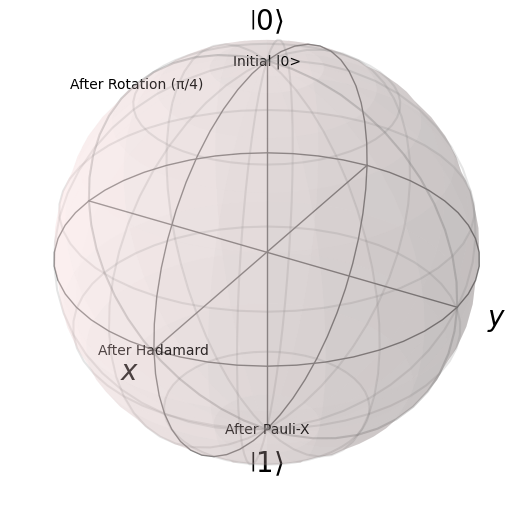

Bloch sphere saved as 'bloch_sphere.png'


In [10]:
# Import required libraries for quantum simulation and visualization
import numpy as np
from qutip import basis, sigmax, sigmay, sigmaz, qeye, expect, Bloch
import matplotlib.pyplot as plt

# Initialize the qubit in |0> state
initial_state = basis(2, 0)

# Define quantum gates
hadamard_gate = (qeye(2) + sigmax()) / np.sqrt(2)  # Hadamard gate for superposition
pauli_x_gate = sigmax()  # Pauli-X gate for NOT operation
theta = np.pi / 4  # Rotation angle for x-axis rotation
rotation_gate = np.cos(theta / 2) * qeye(2) - 1j * np.sin(theta / 2) * sigmax()  # Rotation gate Rx(θ)

# Apply gates to initial state
state_after_hadamard = hadamard_gate * initial_state  # State after Hadamard
state_after_pauli_x = pauli_x_gate * initial_state   # State after Pauli-X
state_after_rotation = rotation_gate * initial_state  # State after rotation

# List of states and labels for visualization
states = [initial_state, state_after_hadamard, state_after_pauli_x, state_after_rotation]
labels = ['Initial |0>', 'After Hadamard', 'After Pauli-X', 'After Rotation (π/4)']
colors = ['blue', 'red', 'green', 'purple']

# Create and configure Bloch sphere
b = Bloch()
b.point_color = colors  # Set colors for points
b.point_marker = ['o'] * len(states)  # Use circle markers
b.point_size = [20] * len(states)  # Set point size

# Add states to Bloch sphere with explicit expectation values
for i, (state, label) in enumerate(zip(states, labels)):
    x = expect(sigmax(), state)
    y = expect(sigmay(), state)
    z = expect(sigmaz(), state)
    b.add_points([x, y, z], meth='l')  # Add point with label
    b.add_annotation([x, y, z], label, fontsize=10)  # Add label to point

# Render and display the Bloch sphere
b.show()

# Optional: Save the figure with simplified method
try:
    b.save('bloch_sphere.png')
    print("Bloch sphere saved as 'bloch_sphere.png'")
except Exception as e:
    print("Error saving Bloch sphere:", str(e))